# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Amico

Student name: Tommaso
    
ID:2054778

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2054778
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)


(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]
print(np.shape(X_train))
print(np.shape(y_train))
labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

(600, 784)
(600,)
Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [55 70 65 49 53 55 58 54 71 70]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


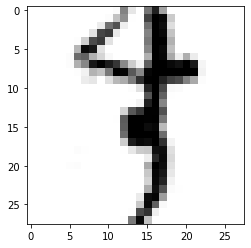

LABEL: 2
INPUT:


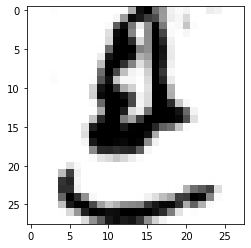

LABEL: 8
INPUT:


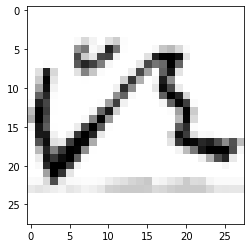

LABEL: 2
INPUT:


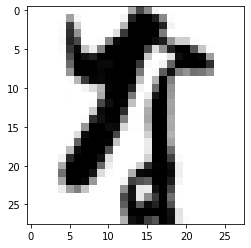

LABEL: 4


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}
#train linear SVM
svm = SVC(kernel='linear')
cross = GridSearchCV(svm, parameters, cv=4)
cross.fit(X_train, y_train)

# ADD YOUR CODE

print ('RESULTS FOR LINEAR KERNEL:\n', pd.DataFrame.from_dict(cross.cv_results_), "\n")

print("Best parameters set found:", cross.best_params_, "\n")
# ADD YOUR CODE

print("Score with best parameters:", cross.best_score_, "\n")
# ADD YOUR CODE

print("All scores on the grid:", "\n")
print(cross.cv_results_['split0_test_score'])
print(cross.cv_results_['split1_test_score'])
print(cross.cv_results_['split2_test_score'])
print(cross.cv_results_['split3_test_score'])
print("\n")
print('\n Mean scores:\n', cross.cv_results_['mean_test_score'])

RESULTS FOR LINEAR KERNEL:
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.040242      0.008091         0.009534        0.000198    0.01   
1       0.037353      0.000599         0.009129        0.000166     0.1   
2       0.037283      0.000591         0.009023        0.000116       1   
3       0.037209      0.000574         0.009035        0.000144      10   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.786667           0.766667           0.673333   
1   {'C': 0.1}           0.793333           0.753333           0.720000   
2     {'C': 1}           0.793333           0.753333           0.720000   
3    {'C': 10}           0.793333           0.753333           0.720000   

   split3_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.700000         0.731667        0.046518                4  
1           0.766667         0.758333        0.026405                1  
2

## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel


svm = SVC(kernel='poly', degree=2)
cross2 = GridSearchCV(svm, parameters, cv=4)
cross2.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL \n', pd.DataFrame.from_dict(cross2.cv_results_), "\n")

print("Best parameters set found:", cross2.best_params_, "\n")
# ADD YOUR CODE

print("Score with best parameters:", cross2.best_score_)
# ADD YOUR CODE

print("\nAll scores on the grid:")
# ADD YOUR CODE
print(np.around(cross2.cv_results_['split0_test_score'], decimals=3))
print(np.around(cross2.cv_results_['split1_test_score'], decimals=3))
print(np.around(cross2.cv_results_['split2_test_score'], decimals=3))
print(np.around(cross2.cv_results_['split3_test_score'], decimals=3))
print("\n")
print('\n Mean scores:\n', cross2.cv_results_['mean_test_score'])

RESULTS FOR POLY DEGREE=2 KERNEL 
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.059173      0.008746         0.012519        0.002438    0.01   
1       0.044101      0.001070         0.009329        0.000087    0.01   
2       0.047073      0.001486         0.008903        0.000155    0.01   
3       0.051355      0.000156         0.010623        0.000051     0.1   
4       0.046955      0.001560         0.008853        0.000067     0.1   
5       0.046854      0.001312         0.008806        0.000128     0.1   
6       0.044078      0.000949         0.009352        0.000132       1   
7       0.047993      0.001277         0.010827        0.003321       1   
8       0.074324      0.004702         0.017219        0.003133       1   

  param_gamma                      params  split0_test_score  \
0        0.01  {'C': 0.01, 'gamma': 0.01}           0.200000   
1         0.1   {'C': 0.01, 'gamma': 0.1}           0.793333   
2           1     {'C'

## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 5
svm = SVC(kernel='poly', degree=5)
cross3 = GridSearchCV(svm, parameters, cv=4)
cross3.fit(X_train, y_train)
# ADD YOUR CODE

print ('RESULTS FOR POLY DEGREE =', degree, ' KERNEL', pd.DataFrame.from_dict(cross3.cv_results_), "\n")

print("Best parameters set found:", cross3.best_params_, "\n")
# ADD YOUR CODE

print("Score with best parameters:", cross3.best_score_, "\n")
# ADD YOUR CODE

print("\nAll scores on the grid:")
# ADD YOUR CODE
print(np.around(cross3.cv_results_['split0_test_score'], decimals=3))
print(np.around(cross3.cv_results_['split1_test_score'], decimals=3))
print(np.around(cross3.cv_results_['split2_test_score'], decimals=3))
print(np.around(cross3.cv_results_['split3_test_score'], decimals=3))
print("\n")
print('\n Mean scores:\n', cross3.cv_results_['mean_test_score'])

RESULTS FOR POLY DEGREE = 5  KERNEL    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.063140      0.009103         0.011432        0.000233    0.01   
1       0.062979      0.006748         0.012933        0.005725    0.01   
2       0.083749      0.014683         0.015511        0.002480    0.01   
3       0.082339      0.009723         0.016173        0.001856     0.1   
4       0.058981      0.000942         0.009918        0.000515     0.1   
5       0.075952      0.013752         0.013790        0.001915     0.1   
6       0.071363      0.004112         0.015036        0.002798       1   
7       0.080113      0.003047         0.019182        0.002955       1   
8       0.064225      0.008769         0.010239        0.001040       1   

  param_gamma                      params  split0_test_score  \
0        0.01  {'C': 0.01, 'gamma': 0.01}           0.133333   
1         0.1   {'C': 0.01, 'gamma': 0.1}           0.566667   
2           1     {'C

## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel

# ADD YOUR CODE
svm = SVC(kernel='rbf')
cross4 = GridSearchCV(svm, parameters, cv=4)
cross4.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL', pd.DataFrame.from_dict(cross4.cv_results_) , "\n")

print("Best parameters set found:", cross4.best_params_, "\n")
# ADD YOUR CODE

print("Score with best parameters:", cross4.best_score_, "\n")
# ADD YOUR CODE

print("\nAll scores on the grid:")
# ADD YOUR CODE
print(np.around(cross4.cv_results_['split0_test_score'], decimals=3))
print(np.around(cross4.cv_results_['split1_test_score'], decimals=3))
print(np.around(cross4.cv_results_['split2_test_score'], decimals=3))
print(np.around(cross4.cv_results_['split3_test_score'], decimals=3))
print("\n")
print('\n Mean scores:\n', np.around(cross4.cv_results_['mean_test_score'], decimals=3))

RESULTS FOR rbf KERNEL     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.063525      0.006591         0.025804        0.000283     0.1   
1        0.060892      0.000307         0.027023        0.001257     0.1   
2        0.085954      0.016583         0.039959        0.009461     0.1   
3        0.071321      0.010777         0.030877        0.006974     0.1   
4        0.062280      0.009464         0.030091        0.006416       1   
5        0.062817      0.001843         0.026474        0.001478       1   
6        0.087128      0.012308         0.031961        0.006348       1   
7        0.082820      0.011820         0.035487        0.004306       1   
8        0.042565      0.002094         0.023439        0.000651      10   
9        0.070800      0.010704         0.027922        0.002826      10   
10       0.087563      0.018179         0.039160        0.012756      10   
11       0.068877      0.002335         0.025872        0.000522 

## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

I observe that the score with the best parameters increase up to the degree 2 case, after that it starts decreasing.
The highest score prediction comes with the rbf kernel.

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel='rbf', C=10, gamma=0.01)
best_SVM.fit(X_train, y_train)
training_error = 1 - best_SVM.score(X_train, y_train)
test_error = 1 - best_SVM.score(X_test, y_test)


# (error is 1 - svm.score)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.181500


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [13]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)

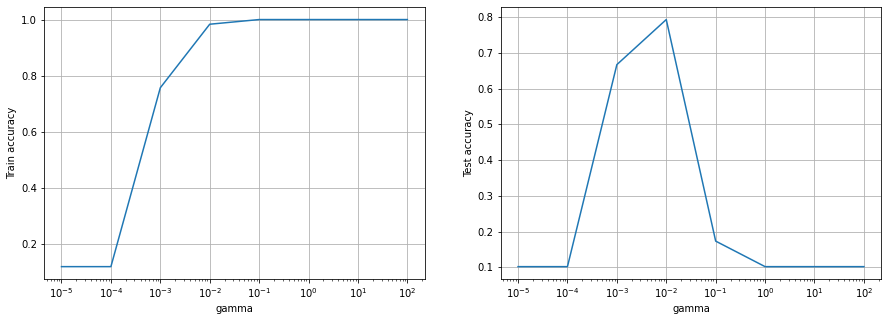

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS
for i in gamma_values:
    svm = SVC(kernel='rbf', C=1, gamma=i)
    svm.fit(X_train, y_train)
    #parameters= {'C': [1],'gamma':[i]}
    #cross = GridSearchCV(svm, parameters, cv=4)
    #cross.fit(X_train, y_train)
    train_acc_list.append(svm.score(X_train, y_train))
    test_acc_list.append(svm.score(X_test, y_test))
# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

We see from the plots that the training accuracy is a monotonic increasing fuinction of gamma.
As far as the test accuracy we see that it has a maximum for gamma=10^{-2}, so we take as the best value of gamma 10^{-2}.
We can interpret the increasing training accuracy with gamma > 10^{-2} as overfitting, with the rbf that tends to fit every point perfectly but with poor generalization capabilities.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [208 190 210 199 209 216 175 217 193 183]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [16]:
#get training and test error for the best SVM model from CV

svm = SVC(kernel='rbf', C=10, gamma=0.01)
svm.fit(X_train, y_train)
training_error = 1 - svm.score(X_train, y_train)
test_error = 1 - svm.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.112172


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [17]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1e5, max_iter=1000)
logreg.fit(X_train, y_train)
training_error = 1-logreg.score(X_train, y_train)
test_error = 1-logreg.score(X_test, y_test)
print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.269224


## TO DO 9 Try  with regularization (use C=1)¶

In [18]:
logreg = linear_model.LogisticRegression(C=1, max_iter=1000)
logreg.fit(X_train, y_train)
training_error = 1-logreg.score(X_train, y_train)
test_error = 1-logreg.score(X_test, y_test)
print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.246655


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

We see how the test error with 2000 training data points is nearly half of what it was with 600 data points.
As far as logistic regression we have that the test error is higher of both the m=2000 and m=600 cases treated with SVM, suggesting that the logistic regression performs worse.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

INPUT:


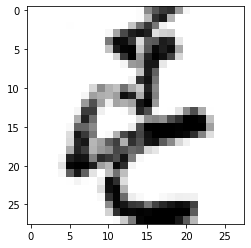

LABEL: 2


In [19]:
misclassified_index = 0
LR_prediction = logreg.predict(X_test)
SVM_prediction = svm.predict(X_test)
for i in range(len(y_test)):
    if SVM_prediction[i] == y_test[i] and LR_prediction[i] != y_test[i]:
        misclassified_index = i
        break
plot_input(X_test,y_test, misclassified_index)

**Here we plot the sample that the logistic regression predicted (failing). We can see that, as we can expect, that the two samples display some similarities**

INPUT:


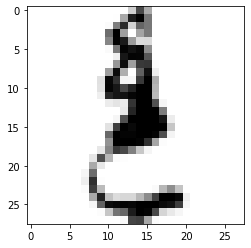

LABEL: 8


In [20]:
index2 = 0
for i in range(len(y_test)):
    if LR_prediction[misclassified_index] == y_test[i]:
        index2 = i
        break
plot_input(X_test, y_test, index2)

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [21]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_test, svm.predict(X_test))
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR =  skm.confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5792 5810 5790 5801 5791 5784 5825 5783 5807 5817]

 Confusion matrix SVM  
 
 [[5417    4    5   15  105   48   13   83   52   50]
 [  19 5010  149   41  137    6  125    5  104  214]
 [   0  147 4866  105   79   23  322   16  152   80]
 [  15   85  133 5352   45   26   16   36   70   23]
 [ 178  139   88   43 5049   12   62   35   95   90]
 [  39   52  143  168   66 5163   33   17   83   20]
 [  11  136  387   36  207   18 4850   75   80   25]
 [  57   19   74   34  163   13   78 5274   49   22]
 [  27  123  105   46   21   42  103    6 5306   28]
 [  18  112  215   23  142    9    9   29   53 5207]]

 Confusion matrix SVM (normalized)   
 
 [[0.94 0.   0.   0.   0.02 0.01 0.   0.01 0.01 0.01]
 [0.   0.86 0.03 0.01 0.02 0.   0.02 0.   0.02 0.04]
 [0.   0.03 0.84 0.02 0.01 0.   0.06 0.   0.03 0.01]
 [0.   0.01 0.02 0.92 0.01 0.   0.   0.01 0.01 0.  ]
 [0.03 0.02 0.02 0.01 0.87 0.   0.01 0.01 0.02 0.02]
 [0.01 0.01 0.02 0.03 0.01 0.89 0.01 0.   0.0

In [22]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX
confusion_SVM2 = skm.confusion_matrix(y_test, svm.predict(X_test), normalize='true')
print(confusion_SVM2)

[[0.94 0.   0.   0.   0.02 0.01 0.   0.01 0.01 0.01]
 [0.   0.86 0.03 0.01 0.02 0.   0.02 0.   0.02 0.04]
 [0.   0.03 0.84 0.02 0.01 0.   0.06 0.   0.03 0.01]
 [0.   0.01 0.02 0.92 0.01 0.   0.   0.01 0.01 0.  ]
 [0.03 0.02 0.02 0.01 0.87 0.   0.01 0.01 0.02 0.02]
 [0.01 0.01 0.02 0.03 0.01 0.89 0.01 0.   0.01 0.  ]
 [0.   0.02 0.07 0.01 0.04 0.   0.83 0.01 0.01 0.  ]
 [0.01 0.   0.01 0.01 0.03 0.   0.01 0.91 0.01 0.  ]
 [0.   0.02 0.02 0.01 0.   0.01 0.02 0.   0.91 0.  ]
 [0.   0.02 0.04 0.   0.02 0.   0.   0.   0.01 0.9 ]]


In [23]:
confusion_LR =  skm.confusion_matrix(y_test, LR_prediction, normalize='true')
print(confusion_LR)

[[0.85 0.   0.   0.01 0.05 0.03 0.   0.03 0.01 0.02]
 [0.   0.73 0.08 0.01 0.04 0.01 0.04 0.   0.04 0.05]
 [0.   0.05 0.64 0.04 0.03 0.03 0.09 0.02 0.07 0.04]
 [0.   0.03 0.02 0.81 0.02 0.04 0.01 0.02 0.04 0.01]
 [0.04 0.06 0.04 0.02 0.7  0.01 0.03 0.02 0.02 0.05]
 [0.01 0.03 0.04 0.04 0.01 0.79 0.02 0.02 0.03 0.01]
 [0.   0.05 0.09 0.01 0.04 0.01 0.71 0.02 0.05 0.01]
 [0.02 0.01 0.02 0.02 0.04 0.02 0.02 0.82 0.02 0.01]
 [0.01 0.05 0.09 0.02 0.02 0.03 0.04 0.01 0.73 0.01]
 [0.02 0.04 0.07 0.01 0.04 0.01 0.01 0.02 0.02 0.76]]


## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


We see how the confusion matrix for SVM at around 0.8 for every label. On the other hand, in the confusion matrix for logistic regression the accuracy are, on average, lower.
The fact that some accuracies are lower for some classes could be dictated by the fact that some simbols are similar between each other. Another reason could be that some symbols are less clearly written than other.